# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}&q="
#params = {"appid":weather_api_key,"limit":1}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | polyarnyy
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | achinsk
Processing Record 8 of Set 1 | ternate
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | chibougamau
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | tsiolkovskiy
City not found. Skipping...
Processing Record 14 of Set 1 | chuguyevka
Processing Record 15 of Set 1 | concepcion
Processing Record 16 of Set 1 | ambodifotatra
Processing Record 17 of Set 1 | lydenburg
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | weno
Processing Record 21 of Set 1 | jiuquan

Processing Record 42 of Set 4 | harstad
Processing Record 43 of Set 4 | guacimo
Processing Record 44 of Set 4 | embarcacion
Processing Record 45 of Set 4 | la ronge
Processing Record 46 of Set 4 | turpan
Processing Record 47 of Set 4 | karlivka
Processing Record 48 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 49 of Set 4 | haiku-pauwela
Processing Record 0 of Set 5 | vanadzor
Processing Record 1 of Set 5 | nizhnyaya poyma
Processing Record 2 of Set 5 | devinuwara
City not found. Skipping...
Processing Record 3 of Set 5 | itoman
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | taltal
Processing Record 6 of Set 5 | saint-joseph
Processing Record 7 of Set 5 | yuzhno-kurilsk
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of Set 5 | abeokuta
Processing Record 10 of Set 5 | mongo
Processing Record 11 of Set 5 | jaffa
Processing Record 12 of Set 5 | geraldton
Processing Record 13 of Set 5 | tyrnyauz
Processing Record 14 o

Processing Record 35 of Set 8 | pandan
Processing Record 36 of Set 8 | galliano
Processing Record 37 of Set 8 | san jose village
City not found. Skipping...
Processing Record 38 of Set 8 | er regueb
Processing Record 39 of Set 8 | iwaki
Processing Record 40 of Set 8 | tome acu
Processing Record 41 of Set 8 | elmendorf air force base
City not found. Skipping...
Processing Record 42 of Set 8 | caldwell
Processing Record 43 of Set 8 | ripoll
Processing Record 44 of Set 8 | happy valley-goose bay
Processing Record 45 of Set 8 | as samawah
Processing Record 46 of Set 8 | abong mbang
Processing Record 47 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 48 of Set 8 | lyantor
Processing Record 49 of Set 8 | cookeville
Processing Record 0 of Set 9 | lubao
Processing Record 1 of Set 9 | qusmuryn
Processing Record 2 of Set 9 | agua dulce
Processing Record 3 of Set 9 | crieff
Processing Record 4 of Set 9 | tommot
Processing Record 5 of Set 9 | ondjiva
Processing Record 6 o

Processing Record 24 of Set 12 | karamay
City not found. Skipping...
Processing Record 25 of Set 12 | morshansk
Processing Record 26 of Set 12 | kincardine
Processing Record 27 of Set 12 | paris
Processing Record 28 of Set 12 | al-`ula
City not found. Skipping...
Processing Record 29 of Set 12 | aguilares
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,13.73,94,100,3.60,US,1691443779
1,olonkinbyen,70.9221,-8.7187,4.26,79,3,2.15,SJ,1691443904
2,port-aux-francais,-49.3500,70.2167,3.60,81,100,16.25,TF,1691443904
3,polyarnyy,69.1989,33.4478,14.61,70,86,3.98,RU,1691443785
4,waitangi,-43.9535,-176.5597,9.34,66,100,6.03,NZ,1691443857


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,13.73,94,100,3.60,US,1691443779
1,olonkinbyen,70.9221,-8.7187,4.26,79,3,2.15,SJ,1691443904
2,port-aux-francais,-49.3500,70.2167,3.60,81,100,16.25,TF,1691443904
3,polyarnyy,69.1989,33.4478,14.61,70,86,3.98,RU,1691443785
4,waitangi,-43.9535,-176.5597,9.34,66,100,6.03,NZ,1691443857


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

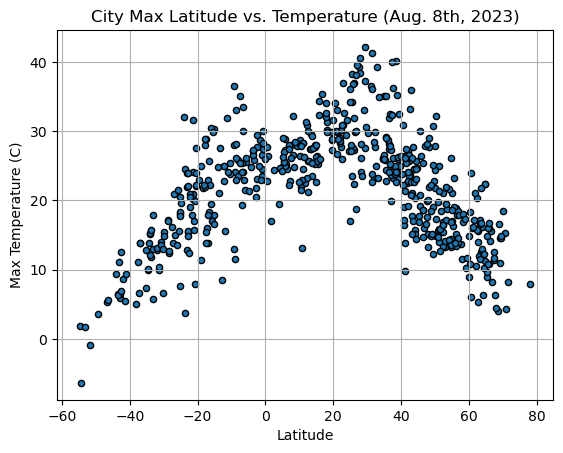

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x="Lat", y="Max Temp", kind="scatter", marker="o", edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (Aug. 8th, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

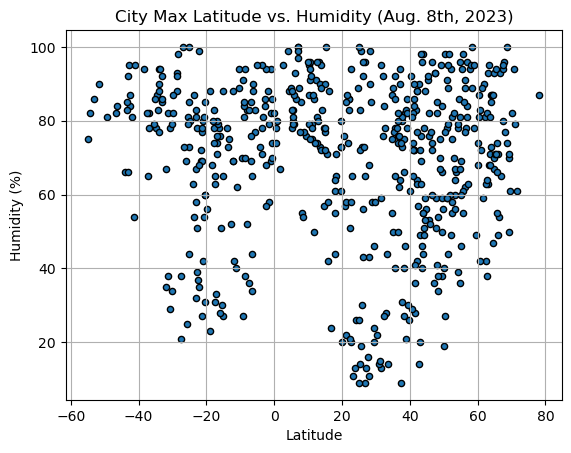

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x="Lat", y="Humidity", kind="scatter", marker="o", edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (Aug. 8th, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

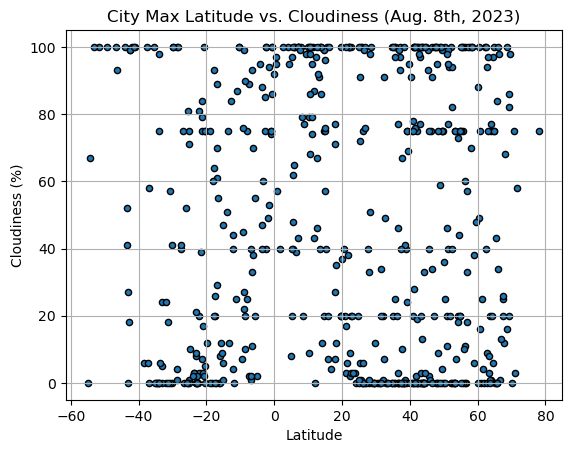

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x="Lat", y="Cloudiness", kind="scatter", marker="o", edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (Aug. 8th, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

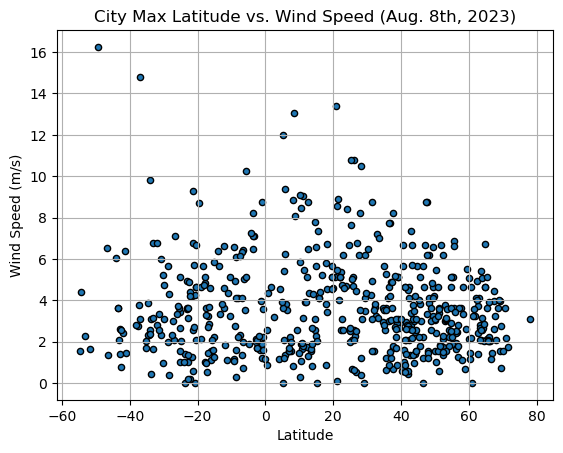

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x="Lat", y="Wind Speed", kind="scatter", marker="o", edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (Aug. 8th, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def linreg_plots(xvalues, yvalues, xlabel, ylabel):
    x_values = xvalues
    y_values = yvalues
    x_label = xlabel
    y_label = ylabel
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_value = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    correlation = st.pearsonr(xvalues,yvalues)
    print(f"The r value is: {correlation[0]}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,13.73,94,100,3.60,US,1691443779
1,olonkinbyen,70.9221,-8.7187,4.26,79,3,2.15,SJ,1691443904
3,polyarnyy,69.1989,33.4478,14.61,70,86,3.98,RU,1691443785
5,achinsk,56.2694,90.4993,15.12,62,60,1.93,RU,1691443905
6,ternate,0.8000,127.4000,26.44,80,57,4.37,ID,1691443905


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,3.60,81,100,16.25,TF,1691443904
4,waitangi,-43.9535,-176.5597,9.34,66,100,6.03,NZ,1691443857
10,port mathurin,-19.6833,63.4167,22.91,56,12,8.70,MU,1691443906
12,concepcion,-36.8270,-73.0498,13.89,82,0,3.09,CL,1691443906
13,ambodifotatra,-16.9833,49.8500,22.89,74,61,3.26,MG,1691443906


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.6554667070535922


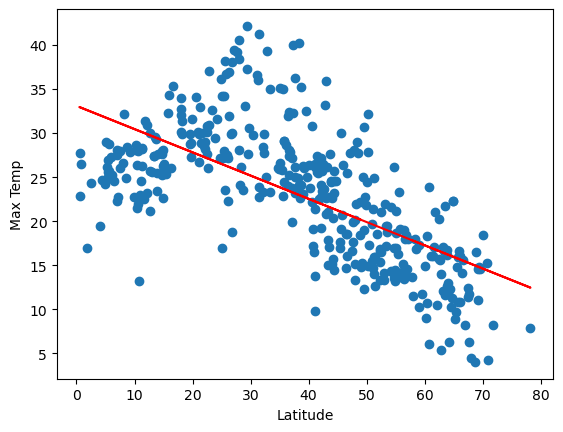

In [39]:
# Linear regression on Northern Hemisphere
xvalues= northern_hemi_df["Lat"]
yvalues= northern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

The r value is: 0.7996062230828679


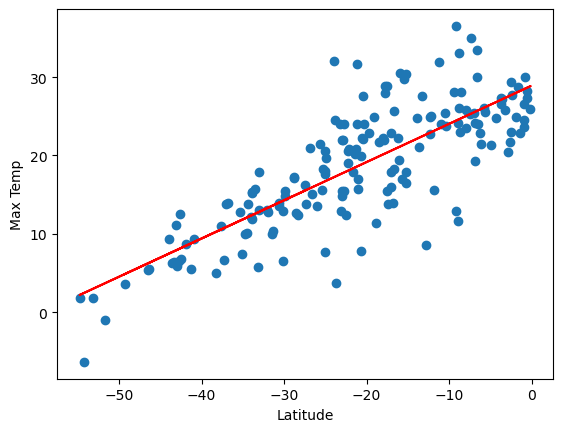

In [40]:
# Linear regression on Southern Hemisphere
xvalues= southern_hemi_df["Lat"]
yvalues= southern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r value is: -0.015112870012952292


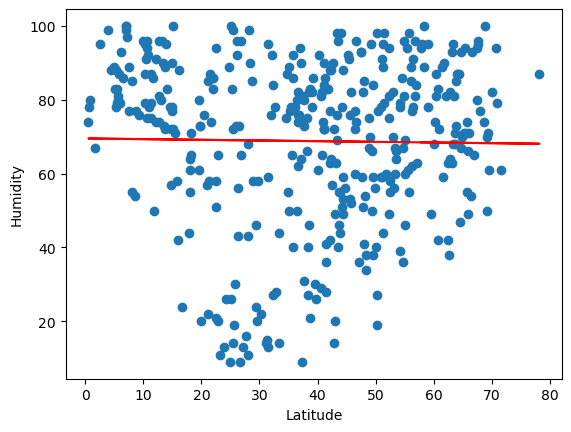

In [41]:
# Northern Hemisphere
xvalues= northern_hemi_df["Lat"]
yvalues= northern_hemi_df["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

The r value is: -0.11975905883823351


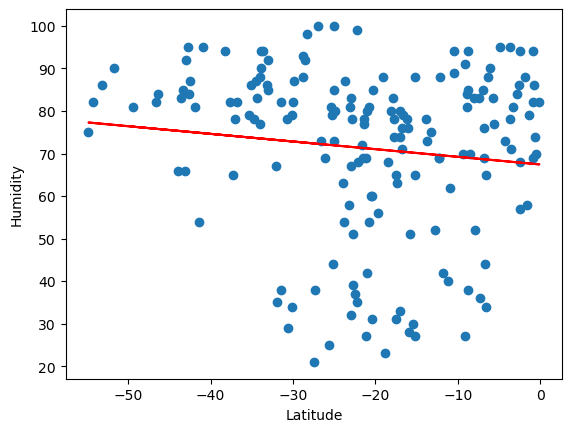

In [42]:
# Southern Hemisphere
xvalues= southern_hemi_df["Lat"]
yvalues= southern_hemi_df["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


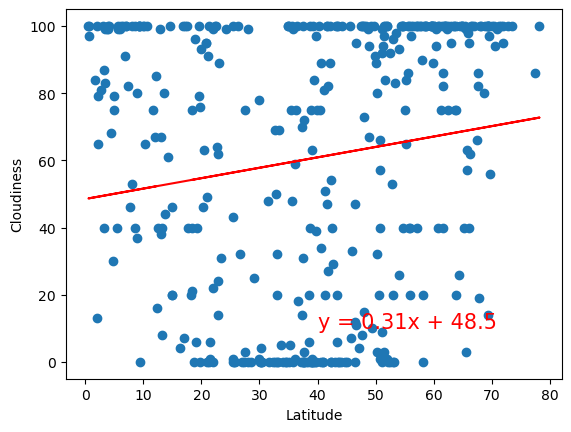

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


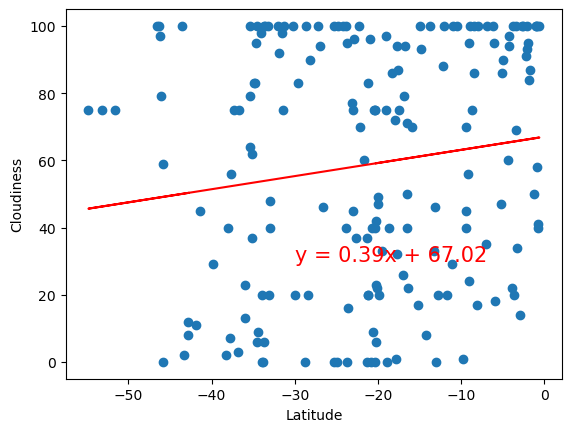

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


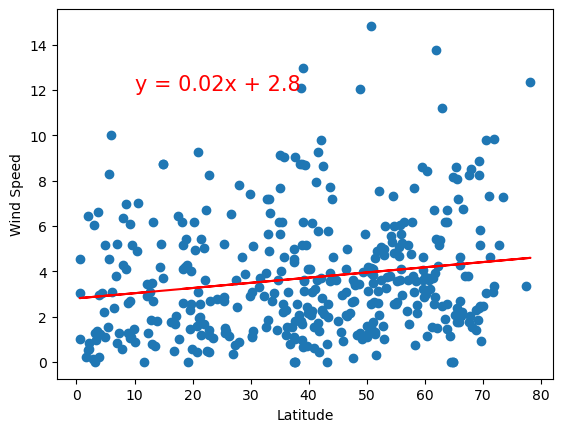

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


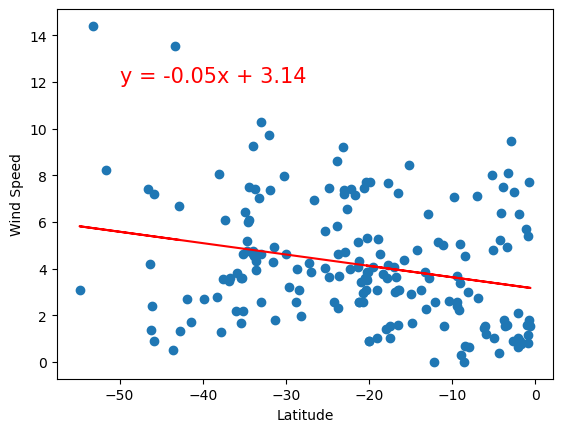

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE